In [7]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import us  # Import the us library

from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.utils.PCUtils.BackgroundKnowledgeOrientUtils import \
    orient_by_background_knowledge

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.preprocessing import StandardScaler

from causallearn.utils.KCI.KCI import KCI_CInd

from causallearn.search.ConstraintBased.FCI import fci


In [10]:
depression = pd.read_csv("Student Depression Dataset.csv")
depression = depression.dropna()
depression = depression.replace({'Yes': 1, 'No': 0})

data_encoded = pd.get_dummies(depression, drop_first=True)
data_encoded = data_encoded[['Academic Pressure', 'Have you ever had suicidal thoughts ?',
 'Financial Stress', 'City_Ahmedabad', 'City_Bhopal', 'City_Faridabad',
 'City_Hyderabad', 'City_Meerut', 'City_Patna', 'Dietary Habits_Moderate',
 'Dietary Habits_Others', 'Dietary Habits_Unhealthy', 'Depression']]

/var/folders/_f/x2yqbk0n1fq31vqq80nd_2j40000gn/T/ipykernel_44236/1557096949.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  depression = depression.replace({'Yes': 1, 'No': 0})


In [11]:
data_encoded = data_encoded.astype(int)
data_encoded.head()

,Academic Pressure,Have you ever had suicidal thoughts ?,Financial Stress,City_Ahmedabad,City_Bhopal,City_Faridabad,City_Hyderabad,City_Meerut,City_Patna,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Depression
0,5,1,1,0,0,0,0,0,0,0,0,0,1
1,2,0,2,0,0,0,0,0,0,1,0,0,0
2,3,0,1,0,0,0,0,0,0,0,0,0,0
3,3,1,5,0,0,0,0,0,0,1,0,0,1
4,4,1,1,0,0,0,0,0,0,1,0,0,0


In [16]:
data_encoded.shape

(27898, 13)

In [17]:
data_encoded = data_encoded[:200]
data_encoded

,Academic Pressure,Have you ever had suicidal thoughts ?,Financial Stress,City_Ahmedabad,City_Bhopal,City_Faridabad,City_Hyderabad,City_Meerut,City_Patna,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Depression
0,5,1,1,0,0,0,0,0,0,0,0,0,1
1,2,0,2,0,0,0,0,0,0,1,0,0,0
2,3,0,1,0,0,0,0,0,0,0,0,0,0
3,3,1,5,0,0,0,0,0,0,1,0,0,1
4,4,1,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,0,4,0,0,0,0,0,0,0,0,0,0
196,5,1,5,0,0,0,0,0,0,0,0,0,1
197,2,1,5,0,0,0,0,0,0,0,0,1,1
198,5,1,4,0,0,0,1,0,0,0,0,0,1


In [18]:
data_matrix = data_encoded.values
data_matrix

array([[5, 1, 1, ..., 0, 0, 1],
       [2, 0, 2, ..., 0, 0, 0],
       [3, 0, 1, ..., 0, 0, 0],
       ...,
       [2, 1, 5, ..., 0, 1, 1],
       [5, 1, 4, ..., 0, 0, 1],
       [4, 1, 2, ..., 0, 0, 1]])

In [19]:
data_matrix.size

2600

In [13]:
# PC with KCI
# cg = pc(data_matrix, indep_test="kci", alpha=0.05)

# plot graph
# cg.draw_pydot_graph()

In [8]:
from causallearn.utils.GraphUtils import GraphUtils

In [20]:
g, edges = fci(data_matrix, independence_test_method='kci')


pdy = GraphUtils.to_pydot(g)

Depth=0, working on node 0:   0%|          | 0/13 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/causallearn/utils/KCI/KCI.py:234: RuntimeWarning: invalid value encountered in scalar divide
  k_appr = mean_appr ** 2 / var_appr
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/causallearn/utils/KCI/KCI.py:235: RuntimeWarning: invalid value encountered in scalar divide
  theta_appr = var_appr / mean_appr
Depth=0, working on node 12: 100%|██████████| 13/13 [00:00<00:00, 141.08it/s]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/causallearn/utils/KCI/KCI.py:596: RuntimeWarning: invalid value encountered in scalar divide
  k_appr = mean_appr ** 2 / var_appr
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/causallearn/utils/KCI/KCI.py:597: RuntimeWarning: invalid value encountered in scalar divide
  theta_appr = var_appr / mean_appr


X2 --> X11
X13 --> X2


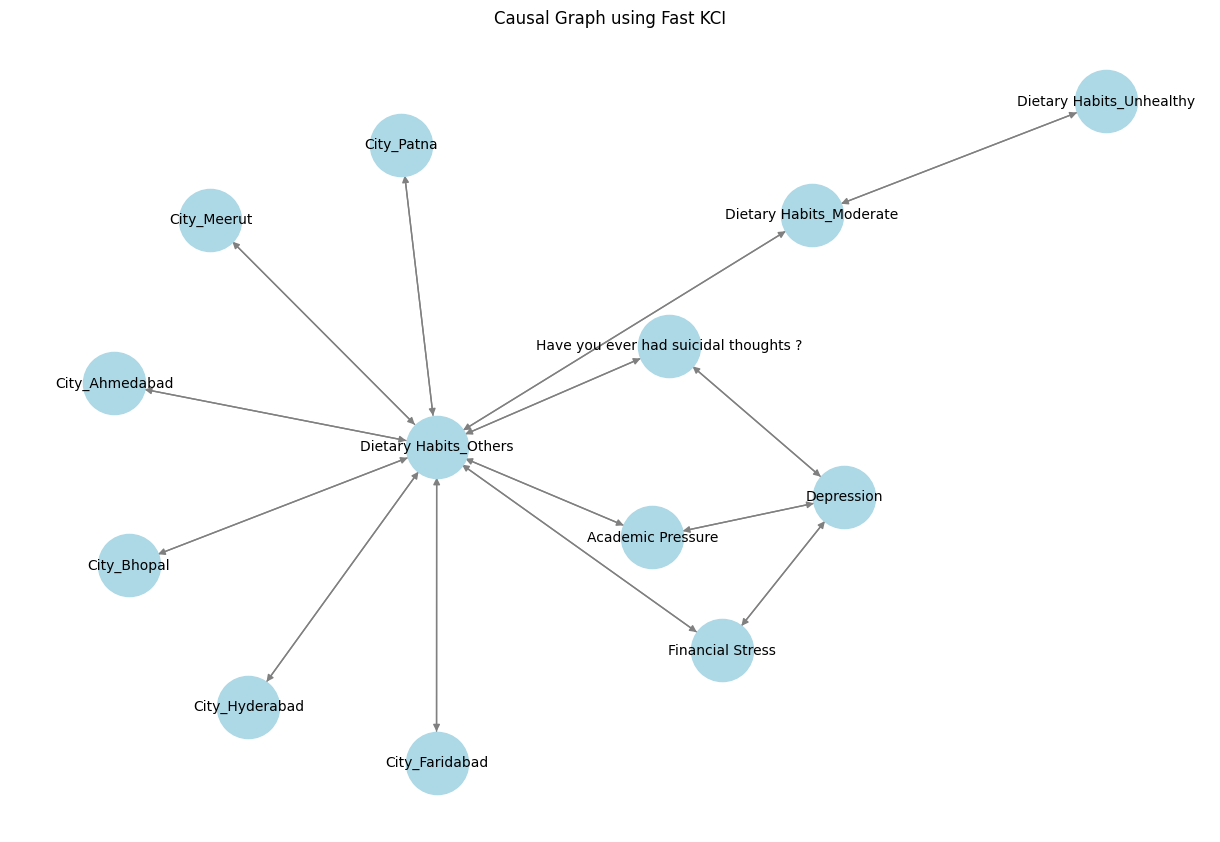

In [36]:
# Convert the causal graph to a networkx graph
G = nx.DiGraph()  # Use DiGraph for directed edges

variable_names = data_encoded.columns.tolist()

# Get the adjacency matrix from the PC output
adj_matrix = g.graph

num_nodes = adj_matrix.shape[0]
for i in range(num_nodes):
    for j in range(num_nodes):
        if adj_matrix[i, j] != 0:  # If there's an edge
            G.add_edge(variable_names[i], variable_names[j])  # Use column names as labels

# Add edges based on adjacency matrix
# num_nodes = adj_matrix.shape[0]
# for i in range(num_nodes):
#    for j in range(num_nodes):
#        if adj_matrix[i, j] != 0:  # If there's an edge
#            G.add_edge(i, j)  # Directed edge from i to j

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", 
        node_size=2000, font_size=10, arrows=True)

pos = nx.circular_layout(G)

edge_labels = {(variable_names[i], variable_names[j]): "" for i in range(num_nodes) for j in range(num_nodes) if adj_matrix[i, j] != 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Causal Graph using Fast KCI")
plt.show()
